**Name**: Yara Hossam El-Din

**Sec**: 2

**BN**: 48

## Regression

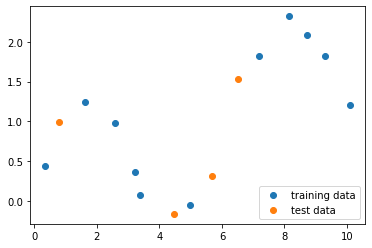

In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [2]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    x=np.linspace(0,10,100)
    result=np.zeros((4,100))
    for i,deg in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(deg)
        trans_features=poly.fit_transform(X_train.reshape(-1,1))
        reg=LinearRegression().fit(trans_features,y_train)
        y_pred=reg.predict(poly.fit_transform(x.reshape(100,1)))
        result[i,:]=y_pred
    return  result

answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

### Fitted model plot

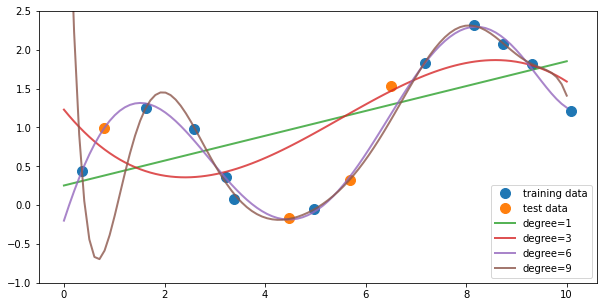

In [3]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above

### Quick note on $R^2$-score:
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [4]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    
    r2_train=np.zeros(10)
    r2_test=np.zeros(10)
    for i,deg in enumerate(range(0,10)):
        poly = PolynomialFeatures(deg)
        
        trans_features=poly.fit_transform(X_train.reshape(11,1))
        reg_model=LinearRegression().fit(trans_features,y_train)
        r2_train[i,]=reg_model.score(trans_features,y_train)
        
        poly_test = PolynomialFeatures(deg)
        trans_features_test=poly_test.fit_transform(X_test.reshape(4,1))
        r2_test[i,]=reg_model.score(trans_features_test,y_test)

    return (r2_train, r2_test)
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))

### Question 3
Plot $R^2$ scores at degrees from 0 to 9.

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

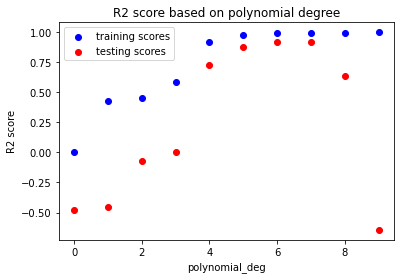

In [5]:
deg=np.linspace(0,9,10)
r2_train,r2_test=answer_two()
plt.scatter(deg,r2_train,c='b',label='training scores') 
plt.scatter(deg,r2_test,c='r',label='testing scores') 
plt.title('R2 score based on polynomial degree')
plt.xlabel('polynomial_deg')
plt.ylabel('R2 score')
plt.legend()

we can see a clear underfitting at deg=1 as the training R score is really poor (0.5)

overfitting is really clear at deg=9 where the gap between training and testing scores is very significant

degrees 6 and 7 seem to be really good fits though.



### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [6]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    poly = PolynomialFeatures(12)
    
    trans_features_train=poly.fit_transform(X_train.reshape(11,1))
    trans_features_test=poly.fit_transform(X_test.reshape(4,1))

    
    reg_model=LinearRegression().fit(trans_features_train,y_train)
    LinearRegression_R2_test_score=reg_model.score(trans_features_test,y_test)
    
    lassoreg_model = Lasso(alpha=0.01,max_iter=10000).fit(trans_features_train, y_train)
    Lasso_R2_test_score=lassoreg_model.score(trans_features_test,y_test)

    return (LinearRegression_R2_test_score, Lasso_R2_test_score)
answer_four()

C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  model = cd_fast.enet_coordinate_descent(


(-4.311980552748659, 0.8406625614750354)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [7]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

reg_model=LinearRegression().fit(X_train.reshape(11,1),y_train)
y_pred=reg_model.predict(X_test.reshape(4,1))
def mse(y_true, y_pred):
    errors_list=[]
    for i in range(0,len(y_true)):
        point_error=(y_true[i]-y_pred[i])**2
        errors_list.append(point_error)
    error=sum(errors_list)/len(y_true)
    return error

e=mse(y_test,y_pred)
print('error with implemented function: ',e)
lib_error=mean_squared_error(y_test, y_pred)
print('error with built-in function: ',lib_error)

error with implemented function:  0.607140956853339
error with built-in function:  0.607140956853339


### Question 6
Implement a linear regression class that can be used by one of the following three optoins (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

In [8]:
from sklearn.linear_model import Ridge

class linear_regression:
    def __new__(self,regression_type='ordinary'):
        
        if regression_type=='ordinary':
            return LinearRegression()
        elif regression_type=='ridge':
            return Ridge()
        elif regression_type=='lasso':
            return Lasso()

my_model=linear_regression('ordinary')
my_model
my_model.fit(X_train.reshape(11,1),y_train)
y_pred_my_model=my_model.predict(X_test.reshape(4,1))
lib_error_my_model=mean_squared_error(y_test, y_pred_my_model)
print(lib_error_my_model)

0.607140956853339


### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [9]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


In [10]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

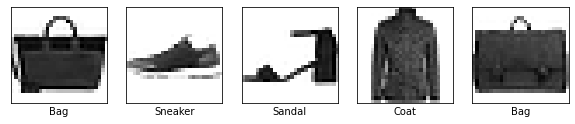

In [11]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [12]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

In [13]:

def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    train_scores=[]
    test_scores=[]
    for classifier in classifiers:
        cv_results=cross_validate(classifier, X, y, cv=5,return_train_score=True)
        train_scores.append(cv_results['train_score'])
        test_scores.append(cv_results['test_score'])
    
    return train_scores,test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [14]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Print train scores and test scores.

In [15]:
print("train_scores: ",train_scores)
print("test_scores: ",test_scores)

train_scores:  [array([0.92142857, 0.91714286, 0.92285714, 0.91714286, 0.91053571]), array([0.86428571, 0.86303571, 0.86660714, 0.86482143, 0.86428571])]
test_scores:  [array([0.80714286, 0.80214286, 0.81785714, 0.815     , 0.82785714]), array([0.81285714, 0.80357143, 0.80857143, 0.81428571, 0.81642857])]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [16]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

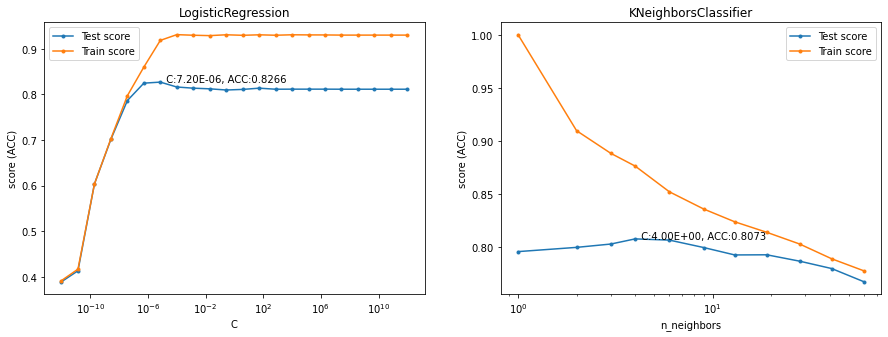

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

in case of logistic regression: we can see th

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [19]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [20]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
X_train.shape

(5250, 784)

In [22]:
y_train.shape

(5250,)

In [23]:
X_test.shape

(1750, 784)

In [24]:
y_test.shape

(1750,)

In [25]:
r2_train_log=model.score(X_train,y_train)
r2_test_log=model.score(X_test,y_test)


In [26]:
print(r2_train_log,r2_test_log)

0.8163809523809524 0.8068571428571428


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [27]:
#### Code for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[145,   2,   2,  10,   2,   0,   9,   0,   5,   0],
       [  0, 167,   3,   4,   0,   0,   1,   0,   0,   0],
       [  1,   0, 114,   2,  31,   0,  25,   0,   2,   0],
       [ 12,   3,   0, 150,   5,   0,   5,   0,   0,   0],
       [  0,   0,  13,  11, 141,   0,   9,   0,   1,   0],
       [  0,   0,   0,   0,   0, 131,   0,  22,   1,  21],
       [ 36,   1,  28,   6,  25,   0,  76,   0,   3,   0],
       [  0,   0,   0,   0,   0,   2,   0, 161,   0,  12],
       [  1,   0,   2,   3,   1,   0,   4,   1, 163,   0],
       [  0,   0,   0,   0,   0,   2,   0,   9,   0, 164]], dtype=int64)

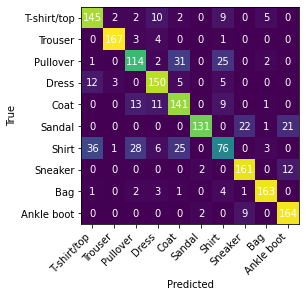

In [28]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [29]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

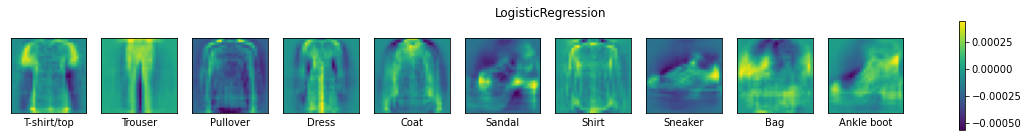

In [30]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(model)

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:** we get a number of plots equal to the number of classes which are 10 in our data. as each model represents a separate problem of classifying a certain class against the rest of classes(one vs all).
features in our data are simply the pixel vallues of our images.(28*28=784)
It seems to ignore certain conditions such as angles of capturing pics and lightning of pics.
there seem t be certain classes that are learned better than others.(for example the trouse and t-shirt classes are much better than the bag and ankle boot classes.


In [31]:
fmnist.features

{0: [0 - pixel1 (numeric)],
 1: [1 - pixel2 (numeric)],
 2: [2 - pixel3 (numeric)],
 3: [3 - pixel4 (numeric)],
 4: [4 - pixel5 (numeric)],
 5: [5 - pixel6 (numeric)],
 6: [6 - pixel7 (numeric)],
 7: [7 - pixel8 (numeric)],
 8: [8 - pixel9 (numeric)],
 9: [9 - pixel10 (numeric)],
 10: [10 - pixel11 (numeric)],
 11: [11 - pixel12 (numeric)],
 12: [12 - pixel13 (numeric)],
 13: [13 - pixel14 (numeric)],
 14: [14 - pixel15 (numeric)],
 15: [15 - pixel16 (numeric)],
 16: [16 - pixel17 (numeric)],
 17: [17 - pixel18 (numeric)],
 18: [18 - pixel19 (numeric)],
 19: [19 - pixel20 (numeric)],
 20: [20 - pixel21 (numeric)],
 21: [21 - pixel22 (numeric)],
 22: [22 - pixel23 (numeric)],
 23: [23 - pixel24 (numeric)],
 24: [24 - pixel25 (numeric)],
 25: [25 - pixel26 (numeric)],
 26: [26 - pixel27 (numeric)],
 27: [27 - pixel28 (numeric)],
 28: [28 - pixel29 (numeric)],
 29: [29 - pixel30 (numeric)],
 30: [30 - pixel31 (numeric)],
 31: [31 - pixel32 (numeric)],
 32: [32 - pixel33 (numeric)],
 33: [

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

In [32]:
#first we start with a tuned model (a goood fit)
#we get a relatively good training score and the test score isn't very lower 
model = LogisticRegression(C=1e-6).fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_train_log=model.score(X_train,y_train)
r2_test_log=model.score(X_test,y_test)
print(r2_train_log,r2_test_log)

0.8763809523809524 0.8331428571428572


C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#now we try training a model that overfits (at c=10^-1)
#here we can see the model clearly overfits as the training score is significally better than the testing one
model_overfit = LogisticRegression(C=1e-1).fit(X_train,y_train)
y_pred_overfit = model_overfit.predict(X_test)
r2_train_log_overfit=model_overfit.score(X_train,y_train)
r2_test_log_overfit=model_overfit.score(X_test,y_test)
print(r2_train_log_overfit,r2_test_log_overfit)

0.9158095238095239 0.812


C:\Users\yarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#now we try training a model that underfits (at c=10^-10)
#here we can see an obvious underfitting, both training and testing scores are so poor
model_underfit = LogisticRegression(C=1e-10).fit(X_train,y_train)
y_pred_underfit = model_underfit.predict(X_test)
r2_train_log_underfit=model_underfit.score(X_train,y_train)
r2_test_log_underfit=model_underfit.score(X_test,y_test)
print(r2_train_log_underfit,r2_test_log_underfit)

0.5577142857142857 0.556


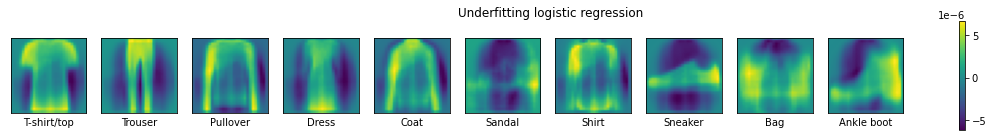

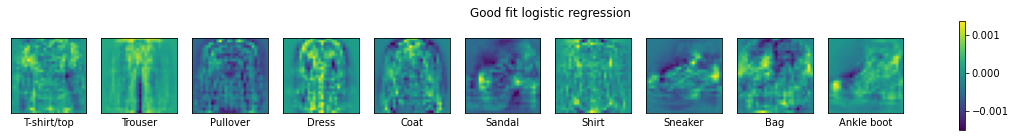

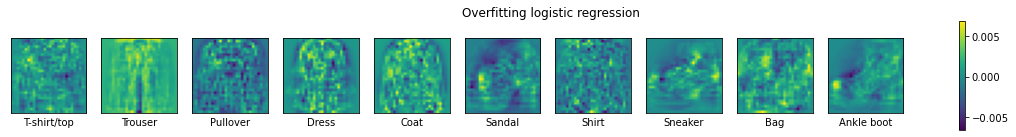

In [35]:
plot_coefficients(model_underfit,"Underfitting logistic regression")
plot_coefficients(model,"Good fit logistic regression")
plot_coefficients(model_overfit,"Overfitting logistic regression")

**Answer:** in case of underfitting, we can see the model is really struggling learning some classes such as the bag and sneaker classes.

while in the overfitting case, we see the model trieg to learn too much about the data including the noise so it can't properly recognize the pics.

the good fit model is obviously the seet spot where the model learned just enough about the data to be able to classify new pics.